In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
col = ['Type', 'Offset', 'Size', 'ResponseTime']
hm0df = pd.read_csv('./dp_hm_0.csv', names=col)
hm1df = pd.read_csv('./dp_hm_1.csv', names=col)
p0df = pd.read_csv('./dp_prn_0.csv', names=col)
p1df = pd.read_csv('./dp_prn_1.csv', names=col)
s0df = pd.read_csv('./dp_stg_0.csv', names=col)
s1df = pd.read_csv('./dp_stg_1.csv', names=col)
tsdf = pd.read_csv('./dp_ts_0.csv', names=col)
hm1df

,Type,Offset,Size,ResponseTime
0,0,383496192,32768,113736
1,0,2822144,65536,71730
2,0,3221266432,4096,121008
3,0,3354624,49152,147664
4,0,2961408,57344,59933
...,...,...,...,...
99995,0,476741632,8192,1070
99996,0,383127552,8192,3422
99997,0,569344,8192,1889
99998,0,3674112,8192,1842


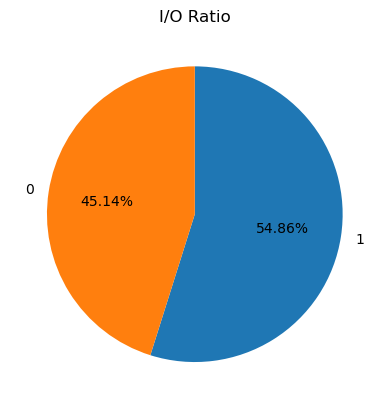

In [10]:
ratio = hm0df.Type.value_counts()
labels = hm0df.Type.value_counts().index
plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=90, counterclock=False)
plt.title('I/O Ratio')
plt.show()

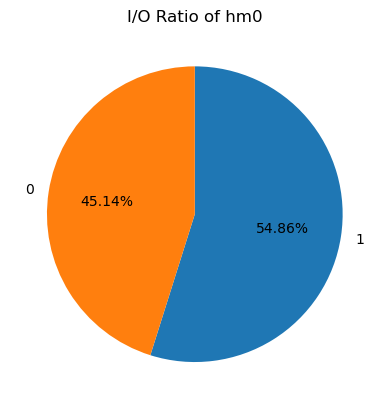

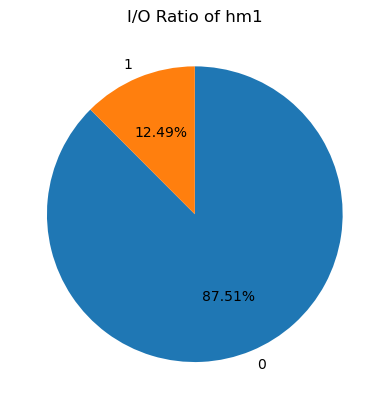

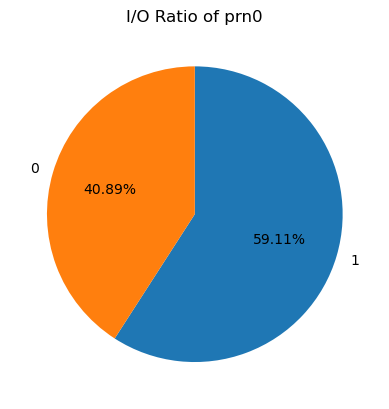

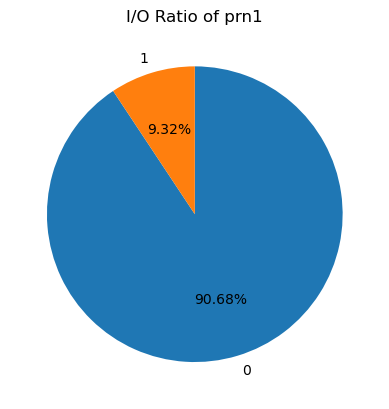

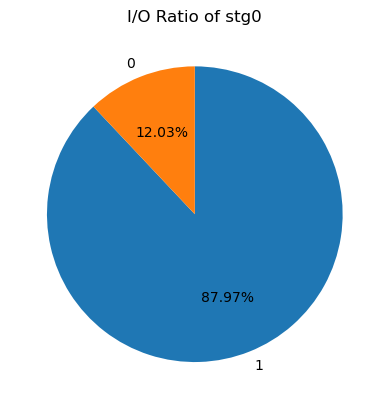

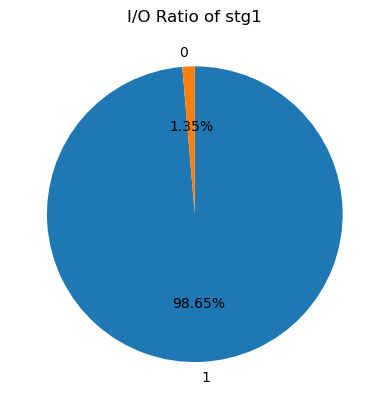

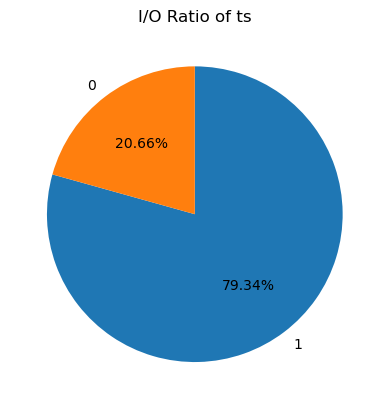

In [2]:
dflists = [hm0df, hm1df, p0df, p1df, s0df, s1df, tsdf]
titles = ['hm0', 'hm1', 'prn0', 'prn1', 'stg0', 'stg1', 'ts']
for dfs, title in zip(dflists, titles):
    ratio = dfs.Type.value_counts()
    labels = dfs.Type.value_counts().index
    plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=90, counterclock=False)
    plt.title(f'I/O Ratio of {title}')
    plt.show()

In [45]:
for dfs, title in zip(dflists, titles):
    print(f'{title} Offset value: {dfs.Offset.nunique()}')

hm0 Offset value: 31903
hm1 Offset value: 4033
prn0 Offset value: 49481
prn1 Offset value: 56454
stg0 Offset value: 14657
stg1 Offset value: 13750
ts Offset value: 14588


In [3]:
for dfs, title in zip(dflists, titles):
    top = 15
    print(f'- Top {top} lists of {title}\n{dfs.Offset.value_counts().head(top)}\n* total: {dfs.Offset.nunique()}\n')

- Top 15 lists of hm0
3154132992     3717
3154137088     3716
200626176      1388
3154124800     1027
3154128896     1027
408989696       925
1023475712      924
13574995968     884
13575004160     734
1122447360      663
13575014400     588
13575000064     588
663928832       536
1316483072      536
432615424       536
Name: Offset, dtype: int64
* total: 31903

- Top 15 lists of hm1
396611584    918
396169216    843
396546048    800
396464128    742
398217216    715
396627968    711
396783616    707
396808192    693
396726272    690
396201984    661
397938688    654
396677120    645
396718080    641
397922304    637
476733440    632
Name: Offset, dtype: int64
* total: 4033

- Top 15 lists of prn0
3154132992     2547
3154137088     2547
277319680      2343
355069952      1562
353435648       782
351338496       782
353438208       781
353442304       781
355070464       781
2482843648      737
58926891008     631
3154128896      522
3154124800      521
3240361984      489
357462016    

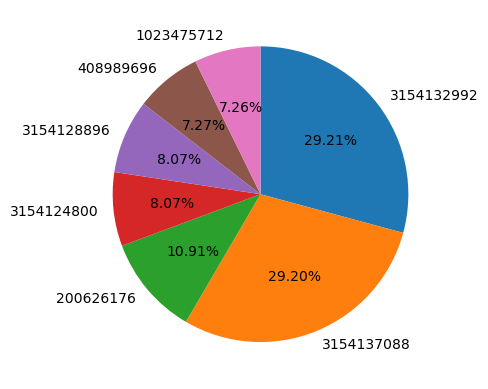

In [34]:
plt.pie(hm0df.Offset.value_counts().head(7), labels=hm0df.Offset.value_counts().head(7).index, autopct='%.2f%%', startangle=90, counterclock=False)
plt.show()

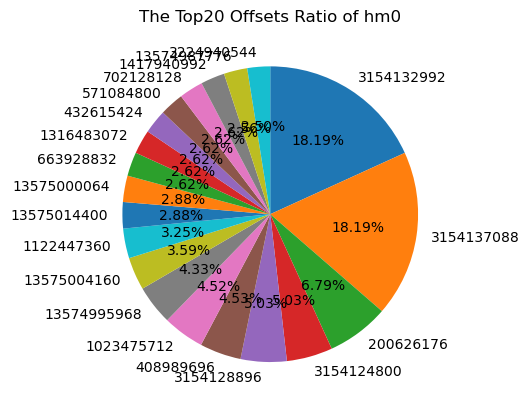

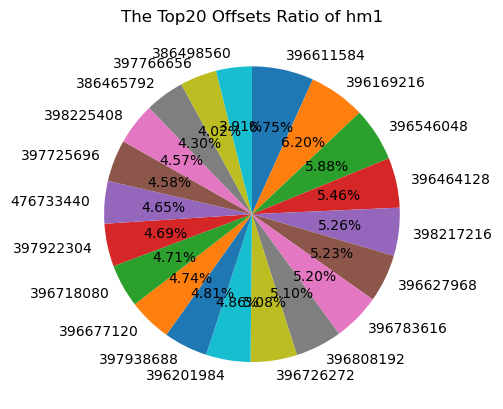

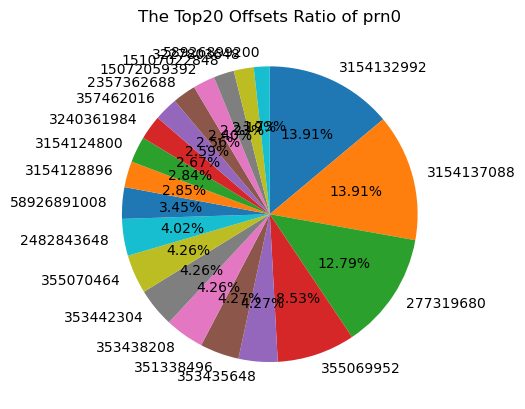

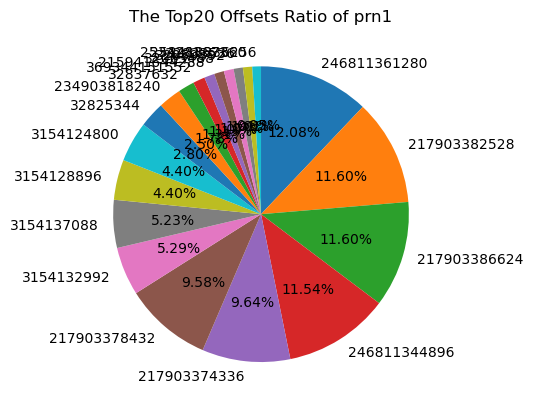

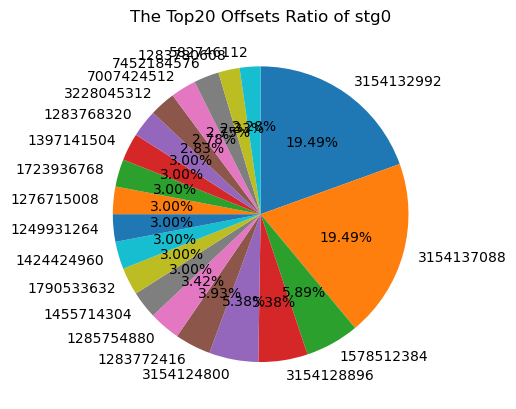

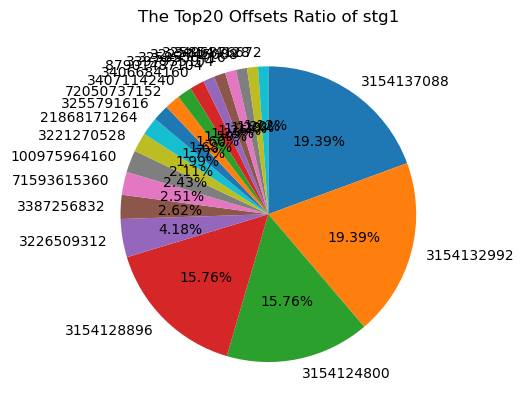

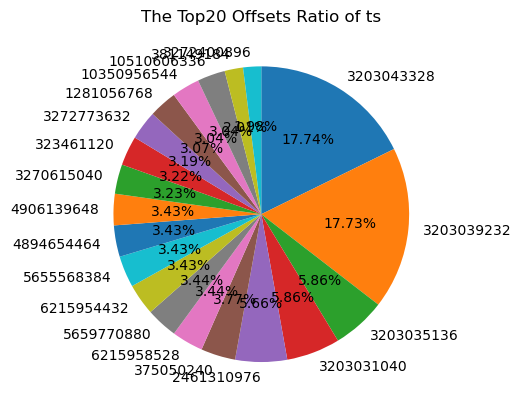

In [4]:
for dfs, title in zip(dflists, titles):
    top = 20
    offset = dfs.Offset.value_counts().head(top)
    olabels = dfs.Offset.value_counts().head(top).index
    plt.pie(offset, labels=olabels, autopct='%.2f%%', startangle=90, counterclock=False)
    plt.title(f'The Top{top} Offsets Ratio of {title}')
    plt.show()

In [13]:
tot = hm0df.Offset.value_counts().values.sum()
t25 = hm0df.Offset.value_counts().head(25).values.sum()
etc = tot - t25
tot, t25, etc

(100000, 22924, 77076)

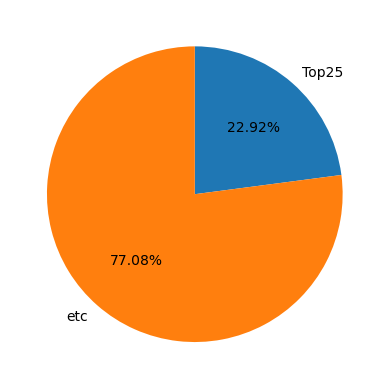

In [14]:
plt.pie([t25, etc], labels=['Top25', 'etc'], autopct='%.2f%%', startangle=90, counterclock=False)
plt.show()

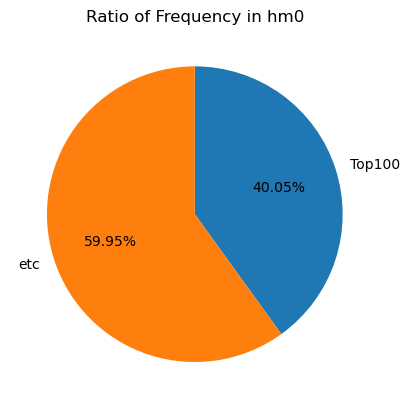

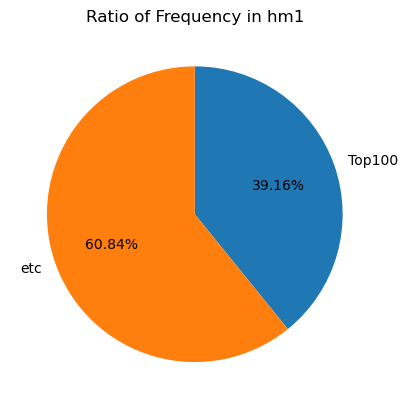

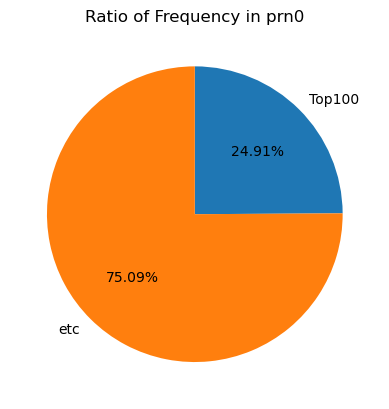

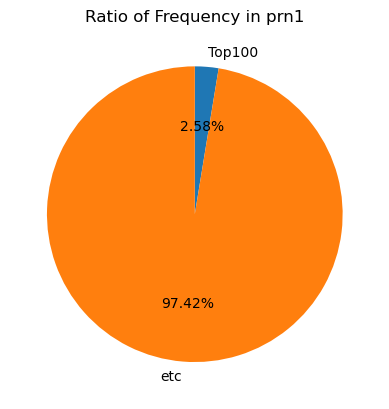

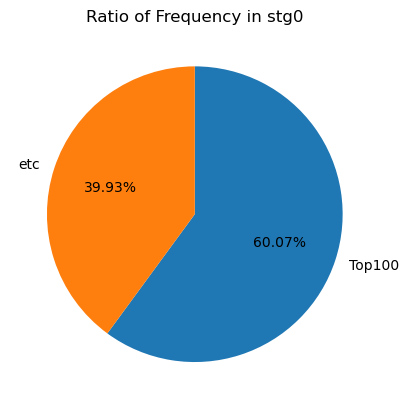

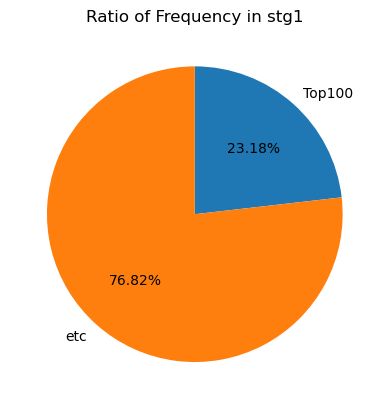

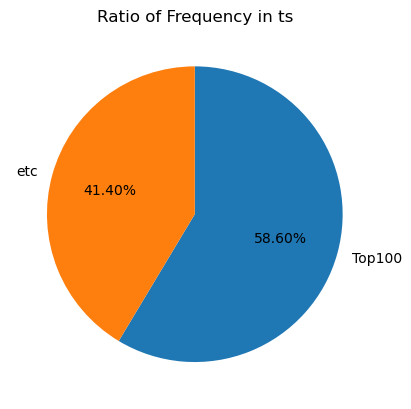

In [20]:
for dfs, title in zip(dflists, titles):
    topn = 100
    total = dfs.Offset.value_counts().values.sum()
    top = dfs.Offset.value_counts().head(topn).values.sum()
    etc = total - top
    plt.pie([top, etc], labels=[f'Top{topn}', 'etc'], autopct='%.2f%%', startangle=90, counterclock=False)
    plt.title(f'Ratio of Frequency in {title}')
    plt.show()

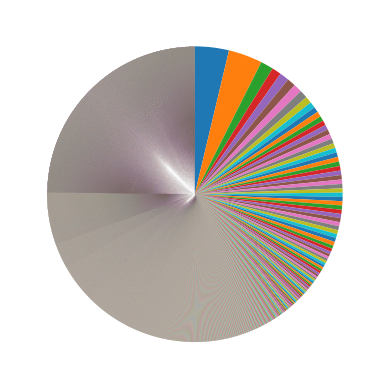

In [3]:
plt.pie(
    hm0df.Offset.value_counts(),
    startangle=90,
    counterclock=False
)
plt.show()

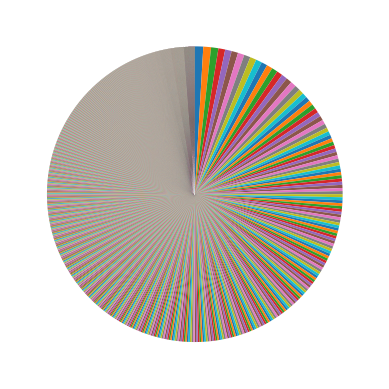

In [4]:
plt.pie(
    hm1df.Offset.value_counts(),
    startangle=90,
    counterclock=False
)
plt.show()

In [7]:
offs = hm0df.Offset.value_counts().head(10).index
offo = hm0df.Offset.value_counts().head(10).index.astype('object')
offo

Index([ 3154132992,  3154137088,   200626176,  3154124800,  3154128896,
         408989696,  1023475712, 13574995968, 13575004160,  1122447360],
      dtype='object')

In [35]:
type(hm0df.Offset.value_counts().index)

pandas.core.indexes.numeric.Int64Index

In [15]:
hm0df.Size.describe()

count    100000.000000
mean       8079.477760
std       23517.707261
min         512.000000
25%        4096.000000
50%        4096.000000
75%        4096.000000
max      749568.000000
Name: Size, dtype: float64

In [18]:
hm0df[hm0df.Offset == hm0df.Offset[0]].Size.sum()

12800

In [26]:
sizes = []
for off in offs:
    sizes.append(hm0df[hm0df.Offset == off].Size.sum())
sizes

[15224832,
 15220736,
 17063936,
 4206592,
 4206592,
 3788800,
 473088,
 452608,
 375808,
 2715648]

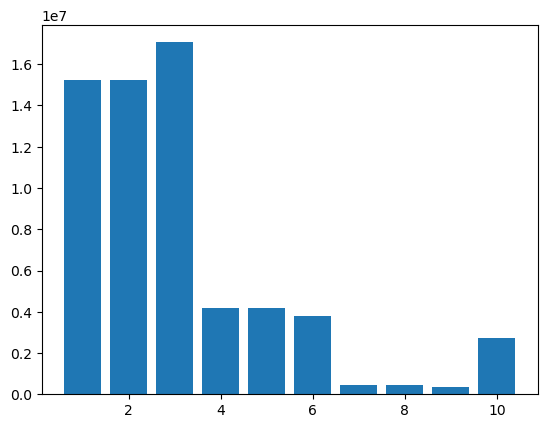

,0
3154132992,1
3154137088,2
200626176,3
3154124800,4
3154128896,5
408989696,6
1023475712,7
13574995968,8
13575004160,9
1122447360,10


In [43]:
plt.bar(np.arange(1, 11), sizes)
plt.show()
pd.DataFrame(np.arange(1, 11), offs)

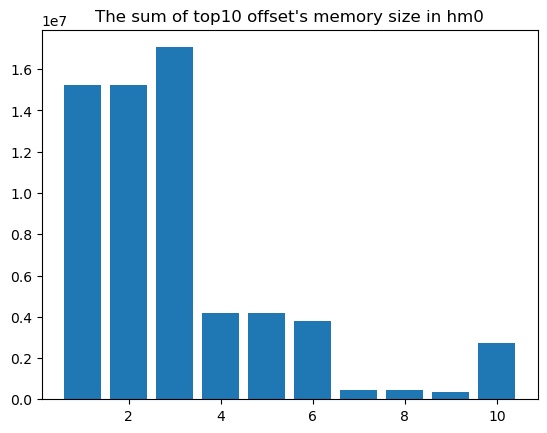

              0
3154132992    1
3154137088    2
200626176     3
3154124800    4
3154128896    5
408989696     6
1023475712    7
13574995968   8
13575004160   9
1122447360   10


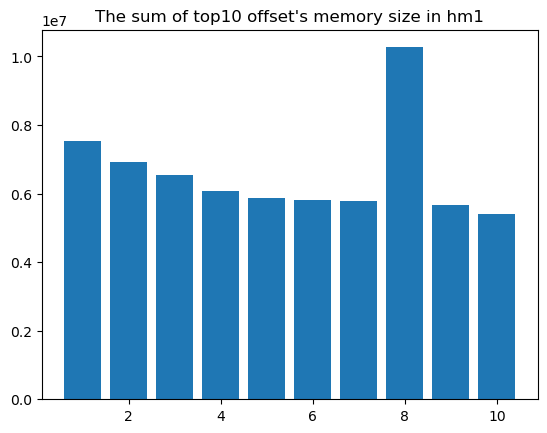

            0
396611584   1
396169216   2
396546048   3
396464128   4
398217216   5
396627968   6
396783616   7
396808192   8
396726272   9
396201984  10


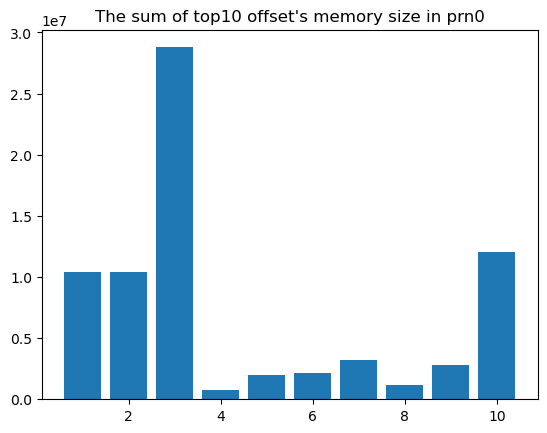

             0
3154132992   1
3154137088   2
277319680    3
355069952    4
353435648    5
351338496    6
353438208    7
353442304    8
355070464    9
2482843648  10


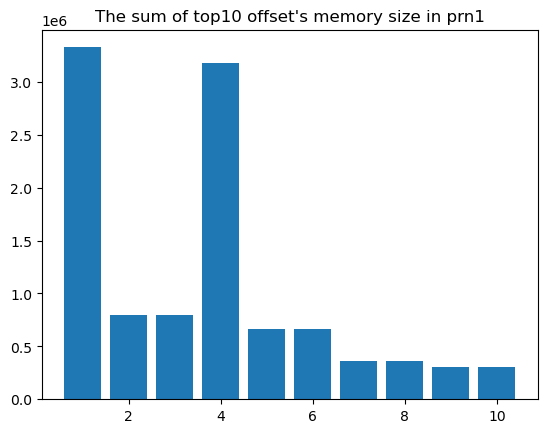

               0
246811361280   1
217903382528   2
217903386624   3
246811344896   4
217903374336   5
217903378432   6
3154132992     7
3154137088     8
3154128896     9
3154124800    10


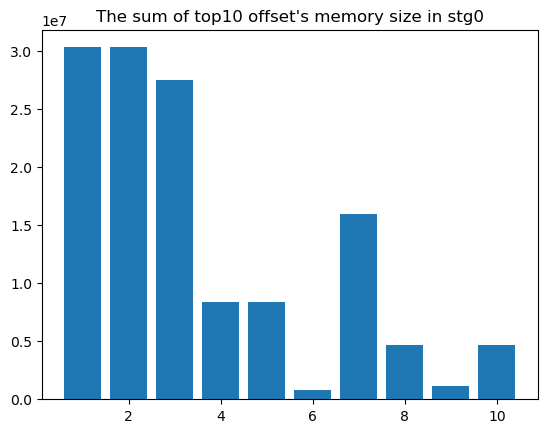

             0
3154132992   1
3154137088   2
1578512384   3
3154128896   4
3154124800   5
1283772416   6
1285754880   7
1455714304   8
1790533632   9
1424424960  10


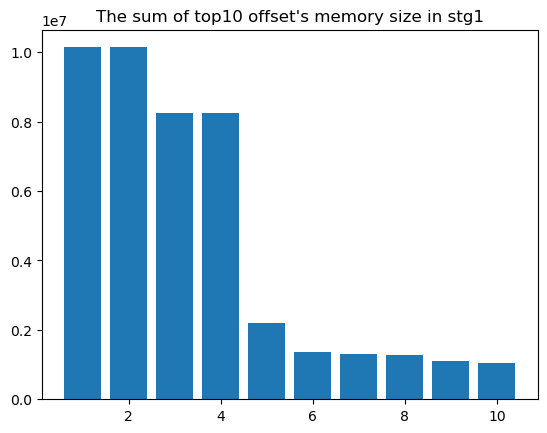

               0
3154137088     1
3154132992     2
3154124800     3
3154128896     4
3226509312     5
3387256832     6
71593615360    7
100975964160   8
3221270528     9
21868171264   10


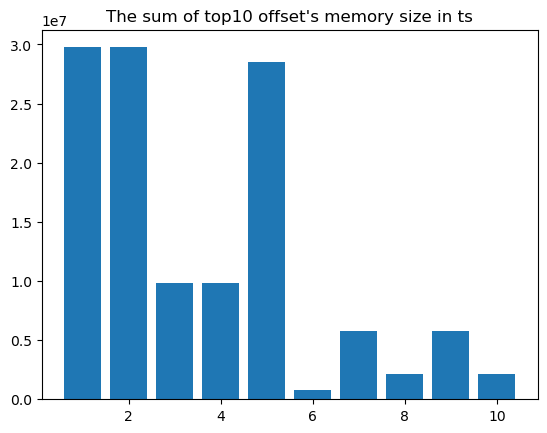

             0
3203043328   1
3203039232   2
3203035136   3
3203031040   4
2461310976   5
375050240    6
6215958528   7
5659770880   8
6215954432   9
5655568384  10


In [48]:
sizes_sum = []
ins = np.arange(1, 11)
for dfs, title in zip(dflists, titles):
    top = 10
    offs = dfs.Offset.value_counts().head(top).index
    for off in offs:
        sizes_sum.append(dfs[dfs.Offset == off].Size.sum())
    plt.bar(ins, sizes_sum)
    plt.title(f'The sum of top{top} offset\'s memory size in {title}')
    plt.show()
    offset_index = pd.DataFrame(ins, offs)
    print(offset_index)
    sizes_sum = []